# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pymysql
import sqlalchemy as alch 

import pandas as pd
from sqlalchemy.sql import delete, select
from sqlalchemy import create_engine, text

import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

## Creating the SQL engine

In [3]:
password = os.getenv("password")
username = os.getenv("user")
server   = os.getenv('server')
dbName   = os.getenv('dbName')
connectionData=f"mysql+pymysql://{username}:{password}@{server}/{dbName}"
engine   = alch.create_engine(connectionData)

In [4]:
import src.SQL as sq

## Webscrapping

### Importing BBC webscrapping

In [5]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',10)
df_bbc_china = bbc.keyword('China',10)
df_bbc_uk = bbc.keyword('UK',10)
df_bbc_us = bbc.keyword('USA',10)

In [ ]:
df_bbc_uk['topic']='uk'
df_bbc_us['topic']='usa'
df_bbc_russia['topic']='russia'
df_bbc_china['topic']='china'

In [ ]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china,df_bbc_uk,df_bbc_us])
df_bbc['source']='bbc'

### Importing CNN webscrapping

In [8]:
import src.CNN_webscrapping as cnn

In [9]:
df_cnn_russia = cnn.keyword('Russia',10)
df_cnn_china = cnn.keyword('China',10)
df_cnn_us = cnn.keyword('USA',10)
df_cnn_uk = cnn.keyword('UK',10)

In [10]:
df_cnn_uk['topic']='uk'
df_cnn_us['topic']='usa'
df_cnn_russia['topic']='russia'
df_cnn_china['topic']='china'

In [11]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china,df_cnn_us,df_cnn_uk])
df_cnn['source']='cnn'

### Importing Peoples's  Daily Online

In [ ]:
import src.peoples_webscrapping as pdo

In [ ]:
df_pd_united_states = pdo.keyword('United States',200)
df_pd_united_kingdom = pdo.keyword('United Kingdom',200)
df_pd_russia = pdo.keyword('russia',200)
df_pd_china = pdo.keyword('china',200)

In [ ]:
df_pd_united_kingdom['topic']='uk'
df_pd_united_states['topic']='usa'
df_pd_russia['topic']='russia'
df_pd_china['topic']='china'

In [ ]:
df_pd=pd.concat([df_pd_united_states,df_pd_united_kingdom,df_pd_russia, df_pd_china])
df_pd['source']='pdo'

### Importing RT webscrapping

In [ ]:
import src.RT_webscrapping as rt

In [ ]:
df_rt_united_states = rt.keyword('United States',200)
df_rt_united_kingdom = rt.keyword('United Kingdom',200)
df_rt_russia = rt.keyword('russia',200)
df_rt_china = rt.keyword('china',200)

In [ ]:
df_rt_united_kingdom['topic']='uk'
df_rt_united_states['topic']='usa'
df_rt_russia['topic']='russia'
df_rt_china['topic']='china'

In [ ]:
df_rt= pd.concat([df_rt_united_states,df_rt_united_kingdom,df_rt_russia,df_rt_china])
df_rt['source']='rt'

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions and applying queries

In [9]:
import src.NLTK_analysis as nk

### Applying to BBC

In [10]:
df_bbc= pd.read_csv('data/raw/bbc_raw.csv')

In [11]:
df_bbc= nk.preprocess(df_bbc)

In [12]:
sq.uploading_to_sql(df_bbc, 'bbc', engine)
df_bbc = sq.drop_opinion_year('bbc',engine)
sq.replace_to_sql(df_bbc, 'bbc', engine)

### Applying to CNN

In [13]:
df_cnn = nk.preprocess(df_cnn)

In [8]:
sq.uploading_to_sql(df_cnn, 'cnn', engine)
df_cnn = sq.drop_opinion_year('cnn',engine)
sq.replace_to_sql(df_cnn, 'cnn', engine)

### Applying to People's Daily Online

In [39]:
df_pd= nk.preprocess(df_pd)

In [40]:
sq.uploading_to_sql(df_pd, 'people', engine)
df_pd = sq.drop_opinion_year('people',engine)
sq.replace_to_sql(df_pd, 'people', engine)

### Applying to RT

In [41]:
df_rt = nk.preprocess(df_rt)

In [42]:
sq.uploading_to_sql(df_rt, 'RT', engine)
df_rt = sq.drop_opinion_year('RT',engine)
sq.replace_to_sql(df_rt, 'RT', engine)

### wordcloud

In [44]:
import src.wordcloud as wc

### Saving all the DF's in one for visualisation

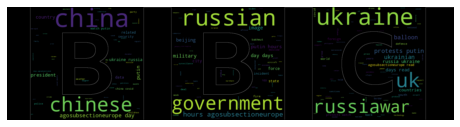

In [45]:
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

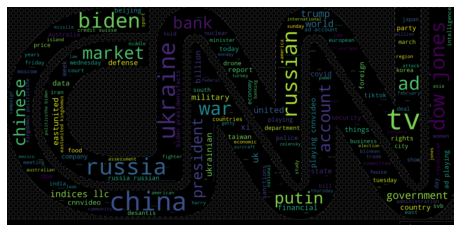

In [46]:
cnn_pic=wc.wordcloud(df_cnn,'usa.png')

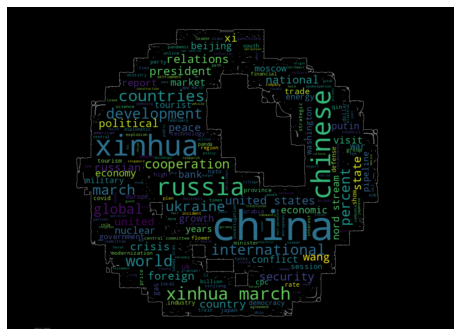

In [47]:
pdo_pic= wc.wordcloud(df_pd,'china.png')

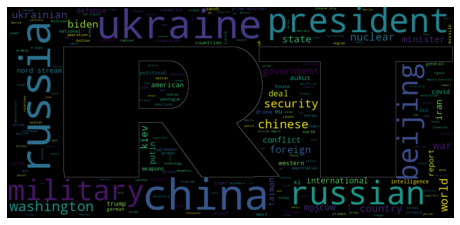

In [48]:
rt_pic= wc.wordcloud(df_rt,'russia.png')

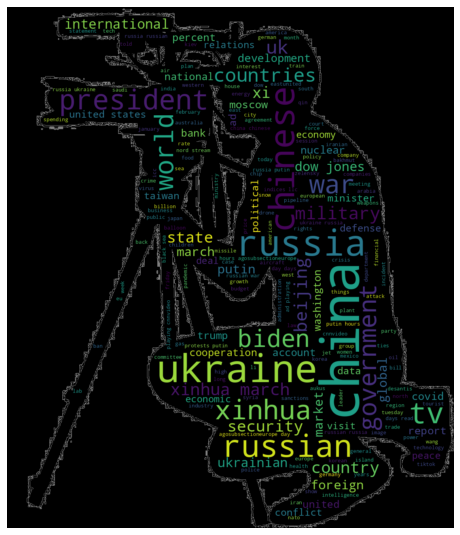

In [49]:
reporter_pic= wc.wordcloud(df_together,'press.png')

### Create DF to save a list of most common words used by western and eastern for visualisation

In [36]:
df_together = pd.concat([df_rt,df_pd,df_cnn,df_bbc])
df_together.to_csv('data/df_together.csv')

In [53]:
df_words = nk.list_words(df_together)
df_words.to_csv ('data/words/all.csv',index=False)

In [54]:
df_west_words= pd.concat([nk.list_words(df_bbc),nk.list_words(df_cnn)])
df_west_words.to_csv('data/words/west.csv',index=False)

In [55]:
df_east_words= pd.concat([nk.list_words(df_pd), nk.list_words(df_rt)])
df_east_words.to_csv('data/words/east.csv',index=False)